# ORGANISATION:THE SPARKS FOUNDATION

# NAME:NISHA SHARMA SINGH

# TASK:6

CREATE THE DECISION TREE CLASSIFIER AND VISUALIZE IT GRPHICALLY

# PURPOSE

IF WE FEED ANY DATASET TO THE CLASSIFIER ,IT WOULD BE ABLE TO PREDICT THE RIGHT CLASS ACCORDINGLY

# TOOL:PYTHON
    
SOFTWERE:JUPYTER NOTEBOOK

# Importing libraries and Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [2]:
ld_df = pd.read_csv('iris.csv')

# Checking the data

In [3]:
ld_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ld_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Dropping unwanted variables

In [5]:
ld_df = ld_df.drop('Id',axis=1)

In [6]:
ld_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
ld_df.shape

(150, 5)

In [8]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


# CHECKING FOR NULL VALUES

In [9]:
ld_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# CHECKING FOR DUPLICATES

In [10]:
ld_df.duplicated().sum()

3

In [11]:
ld_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [12]:
corr=ld_df.corr()

In [13]:
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

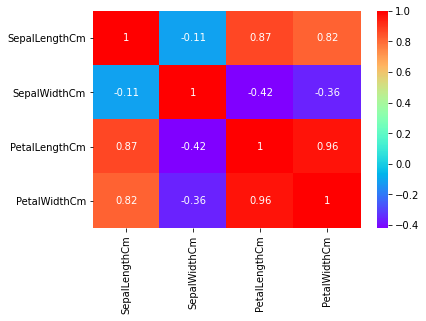

In [14]:
sns.heatmap(corr,annot=True,cmap='rainbow')

# LET US VISUALIZE THE DATA

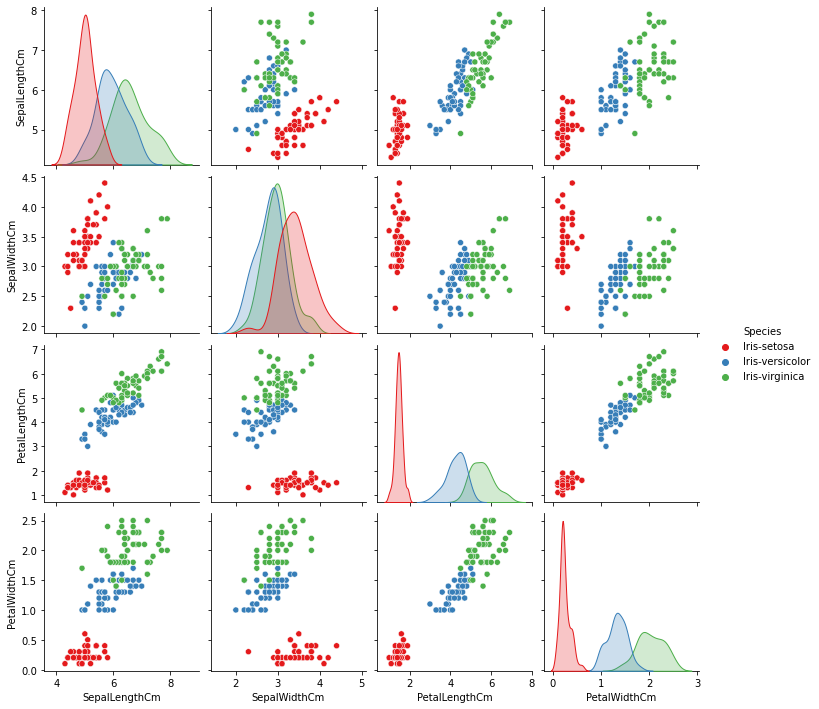

In [15]:
sns.pairplot(data=ld_df,hue='Species',palette='Set1');

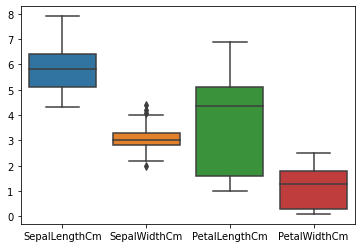

In [16]:
sns.boxplot(data=ld_df);

# Extracting the target column into separate vectors for training set and test set

In [17]:
X = ld_df.drop("Species", axis=1)

y = ld_df.pop("Species")

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Splitting data into training and test set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

# Checking the dimensions of the training and test data

In [19]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (120, 4)
X_test (30, 4)
train_labels (120,)
test_labels (30,)


# Now let us define the Decision Tree Algorithm

In [20]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [21]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [22]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                    Imp
PetalLengthCm  0.584546
PetalWidthCm   0.396653
SepalWidthCm   0.018801
SepalLengthCm  0.000000


In [23]:
y_predict = dt_model.predict(X_test)

# Let us visualize the Decision Tree

In [24]:
from sklearn import tree

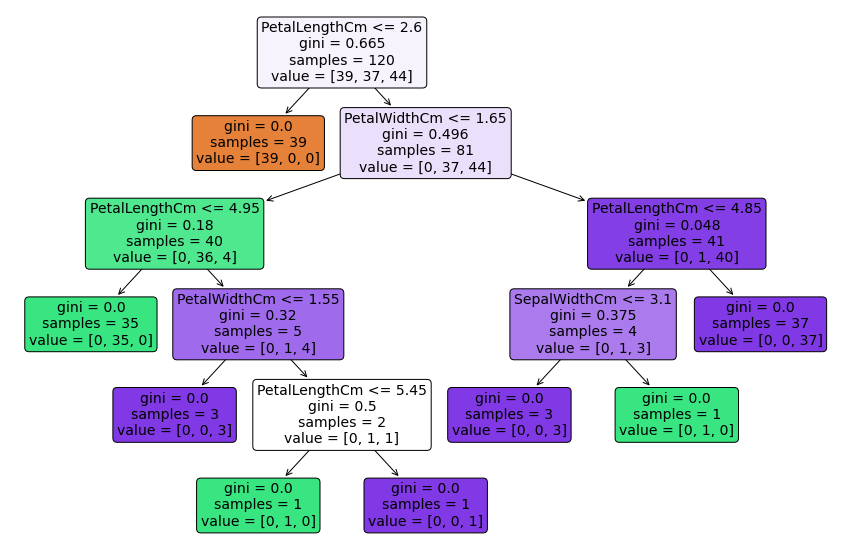

In [26]:
plt.figure(figsize=(15,10))
dt = tree.plot_tree(dt_model, feature_names = X.columns , fontsize = 14 , filled = True, rounded=True)

In [27]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [28]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (120,)
ytest_predict (30,)


# Getting the Predicted Classes

In [29]:
ytest_predict

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Getting the Predicted Probabilities

In [30]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


# Model Evaluation

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
confusion_matrix(train_labels, ytrain_predict)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [34]:
#Train Data Accuracy
dt_model.score(X_train,train_labels) 

1.0

In [35]:
print(classification_report(train_labels, ytrain_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        44

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



# Confusion Matrix for test data

In [36]:
confusion_matrix(test_labels, ytest_predict)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [37]:
#Train Data Accuracy
dt_model.score(X_test,test_labels) 

0.9666666666666667

In [38]:
print(classification_report(test_labels, ytest_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# CONCLUSION: OUR DECISION TREE IS READY TO FEED ANY NEW DATA NOW.

#                    THANK YOU:)
